### Revisiting Machine Learning Case Study

#### Lab | Revisiting Machine Learning Case Study

In this lab, you will use learningSet.csv file which you already have cloned in today's activities. The full process for the week is shown in the PDF file.

#### Instructions

Complete the following steps on the categorical columns in the dataset:

- Check for null values in all the columns

- Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

    - OSOURCE - symbol definitions not provided, too many categories
    - ZIP - we are including state already
    
- Identify columns that have over 50% missing values.

- Remove those columns from the dataframe

- Perform all of the cleaning processes from the Lesson.

- Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest



    - Note that there are a few null values in the column. We will first replace those null values using the code below:
        
        
        print(categorical['GENDER'].value_counts())
        categorical['GENDER'] = categorical['GENDER'].fillna('F')

- Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

- Loading the learningSet.csv into the variable data.

In [2]:
data = pd.read_csv('learningSet.csv')

- First looking at its main features (head, shape) with max columns

In [3]:
display(data.shape)

display(data.head())

(95412, 481)

ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE   DOB NOEXCH  \
0     8901     GRI      0    IL  61081                    3712      0   
1     9401     BOA      1    CA  91326                    5202      0   
2     9001     AMH      1    NC  27017                       0      0   
3     8701     BRY      0    CA  95953                    2801      0   
4     8601              0    FL  33176                    2001      0   

  RECINHSE RECP3 RECPGVG RECSWEEP MDMAUD DOMAIN CLUSTER   AGE AGEFLAG  \
0                                   XXXX     T2      36  60.0           
1                                   XXXX     S1      14  46.0       E   
2                                   XXXX     R2      43   NaN           
3                                   XXXX     R2      44  70.0       E   
4        X     X                    XXXX     S2      16  78.0       E   

  HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18  NUMCHLD  INCOME GENDER  WEALTH1  \
0                                               NaN     NaN      F      NaN   
1        H                               M      1.0     6.0      M      9.0   
2        U                                      NaN     3.0      M      1.0   
3        U                                      NaN     1.0      F      4.0   
4        H                                      1.0     3.0      F      2.0   

   HIT  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  MAGMALE  \
0    0      NaN       NaN      NaN       NaN      NaN     NaN      NaN   
1   16      0.0       0.0      3.0       1.0      1.0     1.0      0.0   
2    2      0.0       0.0      1.0       0.0      0.0     0.0      0.0   
3    2      0.0       0.0      0.0       0.0      0.0     0.0      0.0   
4   60      1.0       0.0      9.0       0.0      4.0     1.0      0.0   

   PUBGARDN  PUBCULIN  PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  PUBOPP DATASRCE  \
0       NaN       NaN      NaN       NaN       NaN       NaN     NaN            
1       0.0       0.0      2.0       0.0       3.0       0.0     0.0        3   
2       0.0       0.0      1.0       0.0       0.0       0.0     0.0        3   
3       0.0       0.0      0.0       0.0       0.0       0.0     1.0        3   
4       0.0       0.0      4.0       0.0       1.0       0.0     1.0        3   

   MALEMILI  MALEVET  VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV SOLP3  \
0         0       39        34        18        10         2       1         
1         0       15        55        11         6         2       1         
2         0       20        29        33         6         8       1         
3         0       23        14        31         3         0       3         
4         1       28         9        53        26         3       2         

  SOLIH MAJOR  WEALTH2 GEOCODE COLLECT1 VETERANS BIBLE CATLG HOMEE PETS  \
0                  5.0                                                    
1                  9.0       2                                            
2                  1.0                                                    
3                  0.0                                                    
4    12            NaN                               Y     Y              

  CDPLAY STEREO PCOWNERS PHOTO CRAFTS FISHER GARDENIN BOATS WALKER KIDSTUFF  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4             Y                     Y               Y            Y            

  CARDS PLATES LIFESRC PEPSTRFL  POP901  POP902  POP903  POP90C1  POP90C2  \
0                             X     992     264     332        0       35   
1                                  3611     940     998       99        0   
2                             X    7001    2040    2669        0        2   
3              

1. Check for null values in all the columns

In [4]:
data.columns[data.isna().any()]

Index(['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS',
       'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN',
       'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2',
       'MSA', 'ADI', 'DMA', 'ADATE_3', 'ADATE_4', 'ADATE_5', 'ADATE_6',
       'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12',
       'ADATE_13', 'ADATE_14', 'ADATE_15', 'ADATE_16', 'ADATE_17', 'ADATE_18',
       'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24',
       'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8',
       'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14',
       'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20',
       'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4',
       'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10',
       'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16',
    

In [5]:
nan_columns = data.columns[data.isna().any()]
print(data[nan_columns].isna().sum())

AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
            ...  
RAMNT_24    77674
NEXTDATE     9973
TIMELAG      9973
CLUSTER2      132
GEOCODE2      132
Length: 92, dtype: int64


2. Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

            - OSOURCE - symbol definitions not provided, too many categories
            - ZIP - we are including state already

In [6]:
drop_list = ['OSOURCE', 'ZIP']

In [7]:
drop_list

['OSOURCE', 'ZIP']

3. Identify columns that have over 50% missing values.

- Calculating the proportion of NaN from the total for each column

In [8]:
data.isna().sum()/len(data)

ODATEDW     0.000000
OSOURCE     0.000000
TCODE       0.000000
STATE       0.000000
ZIP         0.000000
              ...   
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
CLUSTER2    0.001383
GEOCODE2    0.001383
Length: 481, dtype: float64

- Making a df with those proportions

In [9]:
nulls_percent_df = pd.DataFrame(data.isna().sum()*100/len(data)).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

column_name  nulls_percentage
0       ODATEDW          0.000000
1       OSOURCE          0.000000
2         TCODE          0.000000
3         STATE          0.000000
4           ZIP          0.000000
..          ...               ...
476    MDMAUD_R          0.000000
477    MDMAUD_F          0.000000
478    MDMAUD_A          0.000000
479    CLUSTER2          0.138347
480    GEOCODE2          0.138347

[481 rows x 2 columns]

- Filtering the ones that are not 0

In [10]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

column_name  nulls_percentage
16          AGE         24.802960
23      NUMCHLD         87.018404
24       INCOME         22.309563
26      WEALTH1         46.882992
28      MBCRAFT         55.395548
..          ...               ...
455    RAMNT_24         81.409047
466    NEXTDATE         10.452564
467     TIMELAG         10.452564
479    CLUSTER2          0.138347
480    GEOCODE2          0.138347

[92 rows x 2 columns]

In [11]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].head(60)

column_name  nulls_percentage
16          AGE         24.802960
23      NUMCHLD         87.018404
24       INCOME         22.309563
26      WEALTH1         46.882992
28      MBCRAFT         55.395548
29     MBGARDEN         55.395548
30      MBBOOKS         55.395548
31     MBCOLECT         55.458433
32      MAGFAML         55.395548
33       MAGFEM         55.395548
34      MAGMALE         55.395548
35     PUBGARDN         55.395548
36     PUBCULIN         55.395548
37      PUBHLTH         55.395548
38     PUBDOITY         55.395548
39     PUBNEWFN         55.395548
40     PUBPHOTO         55.395548
41       PUBOPP         55.395548
53      WEALTH2         45.930281
195         MSA          0.138347
196         ADI          0.138347
197         DMA          0.138347
362     ADATE_3          2.043768
363     ADATE_4          2.296357
364     ADATE_5         35.205215
365     ADATE_6          3.728043
366     ADATE_7          9.300717
367     ADATE_8          3.679831
368     ADATE_9         11.785729
369    ADATE_10         34.322727
370    ADATE_11         10.923154
371    ADATE_12          9.352073
372    ADATE_13         42.152979
373    ADATE_14         19.774242
374    ADATE_15         68.625540
375    ADATE_16         21.343227
376    ADATE_17         28.979583
377    ADATE_18         22.285457
378    ADATE_19         25.657150
379    ADATE_20         52.613927
380    ADATE_21         36.905211
381    ADATE_22         26.881315
382    ADATE_23         58.975810
383    ADATE_24         38.750891
412     RDATE_3         99.746363
413     RDATE_4         99.705488
414     RDATE_5         99.990567
415     RDATE_6         99.186685
416     RDATE_7         90.677273
417     RDATE_8         77.495493
418     RDATE_9         82.461326
419    RDATE_10         89.035970
420    RDATE_11         84.551209
421    RDATE_12         73.064185
422    RDATE_13         87.160944
423    RDATE_14         75.561774
424    RDATE_15         92.388798
425    RDATE_16         71.707961
426    RDATE_17         90.146942
427    RDATE_18         79.270951

In [12]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].tail(32)

column_name  nulls_percentage
428    RDATE_19         83.359535
429    RDATE_20         91.732696
430    RDATE_21         90.029556
431    RDATE_22         78.123297
432    RDATE_23         91.763091
433    RDATE_24         81.409047
434     RAMNT_3         99.746363
435     RAMNT_4         99.705488
436     RAMNT_5         99.990567
437     RAMNT_6         99.186685
438     RAMNT_7         90.677273
439     RAMNT_8         77.495493
440     RAMNT_9         82.461326
441    RAMNT_10         89.035970
442    RAMNT_11         84.551209
443    RAMNT_12         73.064185
444    RAMNT_13         87.160944
445    RAMNT_14         75.561774
446    RAMNT_15         92.388798
447    RAMNT_16         71.707961
448    RAMNT_17         90.146942
449    RAMNT_18         79.270951
450    RAMNT_19         83.359535
451    RAMNT_20         91.732696
452    RAMNT_21         90.029556
453    RAMNT_22         78.123297
454    RAMNT_23         91.763091
455    RAMNT_24         81.409047
466    NEXTDATE         10.452564
467     TIMELAG         10.452564
479    CLUSTER2          0.138347
480    GEOCODE2          0.138347

- Filtering the ones above the treshold of 25%

In [13]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>50]
columns_above_threshold['column_name']

23      NUMCHLD
28      MBCRAFT
29     MBGARDEN
30      MBBOOKS
31     MBCOLECT
         ...   
451    RAMNT_20
452    RAMNT_21
453    RAMNT_22
454    RAMNT_23
455    RAMNT_24
Name: column_name, Length: 62, dtype: object

In [14]:
columns_to_drop = list(columns_above_threshold['column_name'])

In [15]:
print(columns_to_drop)

['NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'ADATE_15', 'ADATE_20', 'ADATE_23', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


- Adding them to the drop_list

In [16]:
drop_list.extend(columns_to_drop)

In [17]:
print(drop_list)

['OSOURCE', 'ZIP', 'NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'ADATE_15', 'ADATE_20', 'ADATE_23', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


4. Remove those columns from the dataframe

In [18]:
data = data.drop(columns=drop_list, axis=1)

In [19]:
display(data.head())
data.shape

ODATEDW  TCODE STATE MAILCODE PVASTATE   DOB NOEXCH RECINHSE RECP3 RECPGVG  \
0     8901      0    IL                    3712      0                          
1     9401      1    CA                    5202      0                          
2     9001      1    NC                       0      0                          
3     8701      0    CA                    2801      0                          
4     8601      0    FL                    2001      0        X     X           

  RECSWEEP MDMAUD DOMAIN CLUSTER   AGE AGEFLAG HOMEOWNR CHILD03 CHILD07  \
0            XXXX     T2      36  60.0                                    
1            XXXX     S1      14  46.0       E        H                   
2            XXXX     R2      43   NaN                U                   
3            XXXX     R2      44  70.0       E        U                   
4            XXXX     S2      16  78.0       E        H                   

  CHILD12 CHILD18  INCOME GENDER  WEALTH1  HIT DATASRCE  MALEMILI  MALEVET  \
0                     NaN      F      NaN    0                  0       39   
1               M     6.0      M      9.0   16        3         0       15   
2                     3.0      M      1.0    2        3         0       20   
3                     1.0      F      4.0    2        3         0       23   
4                     3.0      F      2.0   60        3         1       28   

   VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV SOLP3 SOLIH MAJOR  WEALTH2  \
0        34        18        10         2       1                        5.0   
1        55        11         6         2       1                        9.0   
2        29        33         6         8       1                        1.0   
3        14        31         3         0       3                        0.0   
4         9        53        26         3       2          12            NaN   

  GEOCODE COLLECT1 VETERANS BIBLE CATLG HOMEE PETS CDPLAY STEREO PCOWNERS  \
0                                                                           
1       2                                                                   
2                                                                           
3                                                                           
4                               Y     Y                        Y            

  PHOTO CRAFTS FISHER GARDENIN BOATS WALKER KIDSTUFF CARDS PLATES LIFESRC  \
0                                                                           
1                                                                           
2                                                                           
3                                                                           
4            Y               Y            Y              Y              3   

  PEPSTRFL  POP901  POP902  POP903  POP90C1  POP90C2  POP90C3  POP90C4  \
0        X     992     264     332        0       35       65       47   
1             3611     940     998       99        0        0       50   
2        X    7001    2040    2669        0        2       98       49   
3        X     640     160     219        0        8       92       54   
4             2520     627     761       99        0        0       46   

   POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  \
0       53    92     1     0     0    11     0     0     0     0      0   
1       50    67     0     0    31     6     4     2     6     4     14   
2       51    96     2     0     0     2     0     0     0     0      0   
3       46    61     0     0    11    32     6     2     0     0      0   
4       54     2    98     0     0     1     0     0     0     0      0   

   ETH11  ETH12  ETH13  ETH14  ETH15  ETH16  AGE901  AGE902  AGE903  AGE904  \
0      0      0     11      0      0      0      39      48      51      40   
1      0      0      2      0      1      4      34      41      43      32   
2      0      0      2      0      0      0      35     

(95412, 417)

5. Perform all of the cleaning processes from the Lesson.

- Renaming the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [20]:
cols=[]
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns=cols

data.head()

odatedw  tcode state mailcode pvastate   dob noexch recinhse recp3 recpgvg  \
0     8901      0    IL                    3712      0                          
1     9401      1    CA                    5202      0                          
2     9001      1    NC                       0      0                          
3     8701      0    CA                    2801      0                          
4     8601      0    FL                    2001      0        X     X           

  recsweep mdmaud domain cluster   age ageflag homeownr child03 child07  \
0            XXXX     T2      36  60.0                                    
1            XXXX     S1      14  46.0       E        H                   
2            XXXX     R2      43   NaN                U                   
3            XXXX     R2      44  70.0       E        U                   
4            XXXX     S2      16  78.0       E        H                   

  child12 child18  income gender  wealth1  hit datasrce  malemili  malevet  \
0                     NaN      F      NaN    0                  0       39   
1               M     6.0      M      9.0   16        3         0       15   
2                     3.0      M      1.0    2        3         0       20   
3                     1.0      F      4.0    2        3         0       23   
4                     3.0      F      2.0   60        3         1       28   

   vietvets  wwiivets  localgov  stategov  fedgov solp3 solih major  wealth2  \
0        34        18        10         2       1                        5.0   
1        55        11         6         2       1                        9.0   
2        29        33         6         8       1                        1.0   
3        14        31         3         0       3                        0.0   
4         9        53        26         3       2          12            NaN   

  geocode collect1 veterans bible catlg homee pets cdplay stereo pcowners  \
0                                                                           
1       2                                                                   
2                                                                           
3                                                                           
4                               Y     Y                        Y            

  photo crafts fisher gardenin boats walker kidstuff cards plates lifesrc  \
0                                                                           
1                                                                           
2                                                                           
3                                                                           
4            Y               Y            Y              Y              3   

  pepstrfl  pop901  pop902  pop903  pop90c1  pop90c2  pop90c3  pop90c4  \
0        X     992     264     332        0       35       65       47   
1             3611     940     998       99        0        0       50   
2        X    7001    2040    2669        0        2       98       49   
3        X     640     160     219        0        8       92       54   
4             2520     627     761       99        0        0       46   

   pop90c5  eth1  eth2  eth3  eth4  eth5  eth6  eth7  eth8  eth9  eth10  \
0       53    92     1     0     0    11     0     0     0     0      0   
1       50    67     0     0    31     6     4     2     6     4     14   
2       51    96     2     0     0     2     0     0     0     0      0   
3       46    61     0     0    11    32     6     2     0     0      0   
4       54     2    98     0     0     1     0     0     0     0      0   

   eth11  eth12  eth13  eth14  eth15  eth16  age901  age902  age903  age904  \
0      0      0     11      0      0      0      39      48      51      40   
1      0      0      2      0      1      4      34      41      43      32   
2      0      0      2      0      0      0      35     

- Replacing the blank values from the column "MAILCODE" by "A" which would mean the address is okay

In [21]:
data['mailcode'].unique()

array([' ', 'B'], dtype=object)

In [22]:
data['mailcode'] = data['mailcode'].apply(lambda x: x.replace(" ", "A"))

In [23]:
data['mailcode'].value_counts(dropna=False)

mailcode
A    94013
B     1399
Name: count, dtype: int64

- After this, replacing the rest of the space characters with np.NaN

In [24]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [25]:
data.head()

odatedw  tcode state mailcode pvastate   dob noexch recinhse recp3 recpgvg  \
0     8901      0    IL        A      NaN  3712      0      NaN   NaN     NaN   
1     9401      1    CA        A      NaN  5202      0      NaN   NaN     NaN   
2     9001      1    NC        A      NaN     0      0      NaN   NaN     NaN   
3     8701      0    CA        A      NaN  2801      0      NaN   NaN     NaN   
4     8601      0    FL        A      NaN  2001      0        X     X     NaN   

  recsweep mdmaud domain cluster   age ageflag homeownr child03 child07  \
0      NaN   XXXX     T2      36  60.0     NaN      NaN     NaN     NaN   
1      NaN   XXXX     S1      14  46.0       E        H     NaN     NaN   
2      NaN   XXXX     R2      43   NaN     NaN        U     NaN     NaN   
3      NaN   XXXX     R2      44  70.0       E        U     NaN     NaN   
4      NaN   XXXX     S2      16  78.0       E        H     NaN     NaN   

  child12 child18  income gender  wealth1  hit datasrce  malemili  malevet  \
0     NaN     NaN     NaN      F      NaN    0      NaN         0       39   
1     NaN       M     6.0      M      9.0   16        3         0       15   
2     NaN     NaN     3.0      M      1.0    2        3         0       20   
3     NaN     NaN     1.0      F      4.0    2        3         0       23   
4     NaN     NaN     3.0      F      2.0   60        3         1       28   

   vietvets  wwiivets  localgov  stategov  fedgov solp3 solih major  wealth2  \
0        34        18        10         2       1   NaN   NaN   NaN      5.0   
1        55        11         6         2       1   NaN   NaN   NaN      9.0   
2        29        33         6         8       1   NaN   NaN   NaN      1.0   
3        14        31         3         0       3   NaN   NaN   NaN      0.0   
4         9        53        26         3       2   NaN    12   NaN      NaN   

  geocode collect1 veterans bible catlg homee pets cdplay stereo pcowners  \
0     NaN      NaN      NaN   NaN   NaN   NaN  NaN    NaN    NaN      NaN   
1       2      NaN      NaN   NaN   NaN   NaN  NaN    NaN    NaN      NaN   
2     NaN      NaN      NaN   NaN   NaN   NaN  NaN    NaN    NaN      NaN   
3     NaN      NaN      NaN   NaN   NaN   NaN  NaN    NaN    NaN      NaN   
4     NaN      NaN      NaN     Y     Y   NaN  NaN    NaN      Y      NaN   

  photo crafts fisher gardenin boats walker kidstuff cards plates lifesrc  \
0   NaN    NaN    NaN      NaN   NaN    NaN      NaN   NaN    NaN     NaN   
1   NaN    NaN    NaN      NaN   NaN    NaN      NaN   NaN    NaN     NaN   
2   NaN    NaN    NaN      NaN   NaN    NaN      NaN   NaN    NaN     NaN   
3   NaN    NaN    NaN      NaN   NaN    NaN      NaN   NaN    NaN     NaN   
4   NaN      Y    NaN        Y   NaN      Y      NaN     Y    NaN       3   

  pepstrfl  pop901  pop902  pop903  pop90c1  pop90c2  pop90c3  pop90c4  \
0        X     992     264     332        0       35       65       47   
1      NaN    3611     940     998       99        0        0       50   
2        X    7001    2040    2669        0        2       98       49   
3        X     640     160     219        0        8       92       54   
4      NaN    2520     627     761       99        0        0       46   

   pop90c5  eth1  eth2  eth3  eth4  eth5  eth6  eth7  eth8  eth9  eth10  \
0       53    92     1     0     0    11     0     0     0     0      0   
1       50    67     0     0    31     6     4     2     6     4     14   
2       51    96     2     0     0     2     0     0     0     0      0   
3       46    61     0     0    11    32     6     2     0     0      0   
4       54     2    98     0     0     1     0     0     0     0      0   

   eth11  eth12  eth13  eth14  eth15  eth16  age901  age902  age903  age904  \
0      0      0     11      0      0      0      39      48      51      40   
1      0      0      2      0      1      4      34      41      43      32   
2      0      0      2      0      0      0      35     




- Separating Target, Numerical Features, and Categorical Features

--------

- Since we have a huge number of features, it would be easier to work independently on numerical features and categorical features.

- For the target variables, for now we will retain them both together. But later, we will build a classification model first where we would need the column TARGET_B only.

In [26]:
Y = data[['target_b', 'target_d']]
Y

target_b  target_d
0             0       0.0
1             0       0.0
2             0       0.0
3             0       0.0
4             0       0.0
...         ...       ...
95407         0       0.0
95408         0       0.0
95409         0       0.0
95410         1      18.0
95411         0       0.0

[95412 rows x 2 columns]

In [27]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['target_b', 'target_d'])
numerical.head()

odatedw  tcode   dob   age  income  wealth1  hit  malemili  malevet  \
0     8901      0  3712  60.0     NaN      NaN    0         0       39   
1     9401      1  5202  46.0     6.0      9.0   16         0       15   
2     9001      1     0   NaN     3.0      1.0    2         0       20   
3     8701      0  2801  70.0     1.0      4.0    2         0       23   
4     8601      0  2001  78.0     3.0      2.0   60         1       28   

   vietvets  wwiivets  localgov  stategov  fedgov  wealth2  pop901  pop902  \
0        34        18        10         2       1      5.0     992     264   
1        55        11         6         2       1      9.0    3611     940   
2        29        33         6         8       1      1.0    7001    2040   
3        14        31         3         0       3      0.0     640     160   
4         9        53        26         3       2      NaN    2520     627   

   pop903  pop90c1  pop90c2  pop90c3  pop90c4  pop90c5  eth1  eth2  eth3  \
0     332        0       35       65       47       53    92     1     0   
1     998       99        0        0       50       50    67     0     0   
2    2669        0        2       98       49       51    96     2     0   
3     219        0        8       92       54       46    61     0     0   
4     761       99        0        0       46       54     2    98     0   

   eth4  eth5  eth6  eth7  eth8  eth9  eth10  eth11  eth12  eth13  eth14  \
0     0    11     0     0     0     0      0      0      0     11      0   
1    31     6     4     2     6     4     14      0      0      2      0   
2     0     2     0     0     0     0      0      0      0      2      0   
3    11    32     6     2     0     0      0      0      0     31      0   
4     0     1     0     0     0     0      0      0      0      0      0   

   eth15  eth16  age901  age902  age903  age904  age905  age906  age907  \
0      0      0      39      48      51      40      50      54      25   
1      1      4      34      41      43      32      42      45      32   
2      0      0      35      43      46      37      45      49      23   
3      0      1      32      40      44      34      43      47      25   
4      0      0      33      45      50      36      46      50      27   

   chil1  chil2  chil3  agec1  agec2  agec3  agec4  agec5  agec6  agec7  \
0     31     42     27     11     14     18     17     13     11     15   
1     33     46     21     13     14     33     23     10      4      2   
2     35     40     25     13     20     19     16     13     10      8   
3     45     35     20     15     25     17     17     12      7      7   
4     34     43     23     14     21     13     15     20     12      5   

   chilc1  chilc2  chilc3  chilc4  chilc5  hhage1  hhage2  hhage3  hhn1  hhn2  \
0      12      11      34      25      18      26      10      23    18    33   
1      11      16      36      22      15      12       1       5     4    21   
2      15      14      30      22      19      25      10      23    21    35   
3      20      17      30      14      19      25      11      23    23    27   
4      13      15      34      19      19      31       7      27    16    26   

   hhn3  hhn4  hhn5  hhn6  marr1  marr2  marr3  marr4  hhp1  hhp2  dw1  dw2  \
0    49    28    12     4     61      7     12     19   198   276   97   95   
1    75    55    23     9     69      4      3     24   317   360   99   99   
2    44    22     6     2     63      9      9     19   183   254   69   69   
3    50    30    15     8     63      9      6     23   199   283   85   83   
4    57    36    24    14     42     17      9     33   235   323   99   98   

   dw3  dw4  dw5  dw6  dw7  dw8  dw9   hv1   hv2  hv3  hv4  hu1  hu2  hu3  \
0    2    2    0    0    7    7    0   479   635    3    2   86   14   96   
1    0    0    0    0    0    0    0  5468  5218   12   10   96    4   97   
2    1    6    5    3    3    3    0   497   546    2    1   78   22   93   
3  

In [28]:
numerical.shape

(95412, 343)

In [29]:
categorical = data.select_dtypes(object)
categorical.head()

state mailcode pvastate noexch recinhse recp3 recpgvg recsweep mdmaud  \
0    IL        A      NaN      0      NaN   NaN     NaN      NaN   XXXX   
1    CA        A      NaN      0      NaN   NaN     NaN      NaN   XXXX   
2    NC        A      NaN      0      NaN   NaN     NaN      NaN   XXXX   
3    CA        A      NaN      0      NaN   NaN     NaN      NaN   XXXX   
4    FL        A      NaN      0        X     X     NaN      NaN   XXXX   

  domain cluster ageflag homeownr child03 child07 child12 child18 gender  \
0     T2      36     NaN      NaN     NaN     NaN     NaN     NaN      F   
1     S1      14       E        H     NaN     NaN     NaN       M      M   
2     R2      43     NaN        U     NaN     NaN     NaN     NaN      M   
3     R2      44       E        U     NaN     NaN     NaN     NaN      F   
4     S2      16       E        H     NaN     NaN     NaN     NaN      F   

  datasrce solp3 solih major geocode collect1 veterans bible catlg homee pets  \
0      NaN   NaN   NaN   NaN     NaN      NaN      NaN   NaN   NaN   NaN  NaN   
1        3   NaN   NaN   NaN       2      NaN      NaN   NaN   NaN   NaN  NaN   
2        3   NaN   NaN   NaN     NaN      NaN      NaN   NaN   NaN   NaN  NaN   
3        3   NaN   NaN   NaN     NaN      NaN      NaN   NaN   NaN   NaN  NaN   
4        3   NaN    12   NaN     NaN      NaN      NaN     Y     Y   NaN  NaN   

  cdplay stereo pcowners photo crafts fisher gardenin boats walker kidstuff  \
0    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   
1    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   
2    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   
3    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   
4    NaN      Y      NaN   NaN      Y    NaN        Y   NaN      Y      NaN   

  cards plates lifesrc pepstrfl rfa_2 rfa_3 rfa_4 rfa_5 rfa_6 rfa_7 rfa_8  \
0   NaN    NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   S4E   S4E   
1   NaN    NaN     NaN      NaN   L2G   A2G   A2G   A2G   A2G   A1E   A1E   
2   NaN    NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   S4F   S4F   
3   NaN    NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   S4E   S4E   
4     Y    NaN       3      NaN   L2F   A2F   A2F   A2F   A1D   I2D   A1E   

  rfa_9 rfa_10 rfa_11 rfa_12 rfa_13 rfa_14 rfa_15 rfa_16 rfa_17 rfa_18 rfa_19  \
0   S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E   
1   A1E    A1E    A1E    A1E    NaN    NaN    NaN    L1E    NaN    NaN    N1E   
2   S4F    NaN    S4F    S4F    S4F    S4F    S4F    S4F    NaN    S4D    S4D   
3   S4E    NaN    S4E    S4E    S4E    S4E    S4E    S4E    S2D    S2D    A1D   
4   A1E    L1D    A1E    A1E    L1D    L3D    NaN    L3D    A2D    A2D    A3D   

  rfa_20 rfa_21 rfa_22 rfa_23 rfa_24 rfa_2r rfa_2a mdmaud_r mdmaud_f mdmaud_a  \
0    S4E    S4E    S4E    S4E    S4E      L      E        X        X        X   
1    N1E    N1E    N1E    NaN    F1E      L      G        X        X        X   
2    NaN    NaN    S4D    S4D    S3D      L      E        X        X        X   
3    A1D    A1D    A1D    NaN    NaN      L      E        X        X        X   
4    A3D    A3D    I4E    A3D    A3D      L      F        X        X        X   

  geocode2  
0        C  
1        A  
2        C  
3        C  
4        A

In [30]:
categorical.shape

(95412, 72)

- Checking NaN proportion for categoricals

In [31]:
categorical.isna().sum()*100/len(categorical)

state        0.000000
mailcode     0.000000
pvastate    98.471890
noexch       0.007337
recinhse    92.974678
              ...    
rfa_2a       0.000000
mdmaud_r     0.000000
mdmaud_f     0.000000
mdmaud_a     0.000000
geocode2     0.334339
Length: 72, dtype: float64

- Reducing the number of categories in a column by grouping

In [32]:
df = pd.DataFrame(categorical['state'].value_counts()).reset_index()

df.columns = ['state', 'count']
df

state  count
0     CA  17343
1     FL   8376
2     TX   7535
3     IL   6420
4     MI   5654
5     NC   4160
6     WA   3577
7     GA   3403
8     IN   2980
9     WI   2795
10    MO   2712
11    TN   2492
12    AZ   2407
13    OR   2183
14    MN   2175
15    CO   2032
16    SC   1759
17    AL   1705
18    KY   1620
19    OK   1617
20    LA   1594
21    KS   1294
22    IA   1271
23    AR   1020
24    MS    986
25    NV    979
26    NM    877
27    NE    754
28    UT    569
29    ID    533
30    MT    527
31    HI    449
32    SD    301
33    WY    283
34    AK    282
35    ND    260
36    AP     81
37    NY     71
38    VA     55
39    OH     52
40    PA     38
41    MD     34
42    NJ     26
43    MA     25
44    CT     23
45    AA     18
46    AE     15
47    ME     11
48    NH      8
49    VT      7
50    RI      6
51    VI      5
52    WV      4
53    GU      4
54    DE      3
55    DC      1
56    AS      1

- Grouping states with counts less than 2500 into other

In [33]:
other_states = list(df[df['count']<2500]['state'])
other_states

def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['state'] = list(map(clean_state, categorical['state']))

In [34]:
categorical['state'].value_counts()

state
other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: count, dtype: int64

- Replacing the domain NaN with the category that is represented the most

In [35]:
categorical['domain'].value_counts(dropna=False)

domain
R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
C1      6145
C3      5280
T1      4982
R3      4809
U1      4510
U2      3254
U3      2598
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: count, dtype: int64

- Filling NaN with the mode (small NaN proportion and we decide the most common value)

In [36]:
categorical['domain'] = categorical['domain'].fillna('R2')

- Splitting the data into two columns domain_a and domain_b.

- domain_a will consist of the first character from the DOMAIN
- domain_b will consist of the second character from the DOMAIN

In [37]:
categorical['domain_a'] = list(map(lambda x: x[0], categorical['domain']))
categorical['domain_b'] = list(map(lambda x: x[1], categorical['domain']))

In [38]:
categorical[['domain','domain_a','domain_b']].head()

domain domain_a domain_b
0     T2        T        2
1     S1        S        1
2     R2        R        2
3     R2        R        2
4     S2        S        2

- Dropping the original column domain

In [39]:
categorical = categorical.drop(columns=['domain'])

In [40]:
categorical.head()

state mailcode pvastate noexch recinhse recp3 recpgvg recsweep mdmaud  \
0    IL        A      NaN      0      NaN   NaN     NaN      NaN   XXXX   
1    CA        A      NaN      0      NaN   NaN     NaN      NaN   XXXX   
2    NC        A      NaN      0      NaN   NaN     NaN      NaN   XXXX   
3    CA        A      NaN      0      NaN   NaN     NaN      NaN   XXXX   
4    FL        A      NaN      0        X     X     NaN      NaN   XXXX   

  cluster ageflag homeownr child03 child07 child12 child18 gender datasrce  \
0      36     NaN      NaN     NaN     NaN     NaN     NaN      F      NaN   
1      14       E        H     NaN     NaN     NaN       M      M        3   
2      43     NaN        U     NaN     NaN     NaN     NaN      M        3   
3      44       E        U     NaN     NaN     NaN     NaN      F        3   
4      16       E        H     NaN     NaN     NaN     NaN      F        3   

  solp3 solih major geocode collect1 veterans bible catlg homee pets cdplay  \
0   NaN   NaN   NaN     NaN      NaN      NaN   NaN   NaN   NaN  NaN    NaN   
1   NaN   NaN   NaN       2      NaN      NaN   NaN   NaN   NaN  NaN    NaN   
2   NaN   NaN   NaN     NaN      NaN      NaN   NaN   NaN   NaN  NaN    NaN   
3   NaN   NaN   NaN     NaN      NaN      NaN   NaN   NaN   NaN  NaN    NaN   
4   NaN    12   NaN     NaN      NaN      NaN     Y     Y   NaN  NaN    NaN   

  stereo pcowners photo crafts fisher gardenin boats walker kidstuff cards  \
0    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   NaN   
1    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   NaN   
2    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   NaN   
3    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   NaN   
4      Y      NaN   NaN      Y    NaN        Y   NaN      Y      NaN     Y   

  plates lifesrc pepstrfl rfa_2 rfa_3 rfa_4 rfa_5 rfa_6 rfa_7 rfa_8 rfa_9  \
0    NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   S4E   S4E   S4E   
1    NaN     NaN      NaN   L2G   A2G   A2G   A2G   A2G   A1E   A1E   A1E   
2    NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   S4F   S4F   S4F   
3    NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   S4E   S4E   S4E   
4    NaN       3      NaN   L2F   A2F   A2F   A2F   A1D   I2D   A1E   A1E   

  rfa_10 rfa_11 rfa_12 rfa_13 rfa_14 rfa_15 rfa_16 rfa_17 rfa_18 rfa_19  \
0    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E   
1    A1E    A1E    A1E    NaN    NaN    NaN    L1E    NaN    NaN    N1E   
2    NaN    S4F    S4F    S4F    S4F    S4F    S4F    NaN    S4D    S4D   
3    NaN    S4E    S4E    S4E    S4E    S4E    S4E    S2D    S2D    A1D   
4    L1D    A1E    A1E    L1D    L3D    NaN    L3D    A2D    A2D    A3D   

  rfa_20 rfa_21 rfa_22 rfa_23 rfa_24 rfa_2r rfa_2a mdmaud_r mdmaud_f mdmaud_a  \
0    S4E    S4E    S4E    S4E    S4E      L      E        X        X        X   
1    N1E    N1E    N1E    NaN    F1E      L      G        X        X        X   
2    NaN    NaN    S4D    S4D    S3D      L      E        X        X        X   
3    A1D    A1D    A1D    NaN    NaN      L      E        X        X        X   
4    A3D    A3D    I4E    A3D    A3D      L      F        X        X        X   

  geocode2 domain_a domain_b  
0        C        T        2  
1        A        S        1  
2        C        R        2  
3        C        R        2  
4        A        S        2

- Dropping other columns that are not relevant

In [41]:
drop_list=[]

In [42]:
categorical['mailcode'].value_counts()

mailcode
A    94013
B     1399
Name: count, dtype: int64

In [43]:
drop_list.append('mailcode')

In [44]:
categorical['noexch'].value_counts(dropna=False)

noexch
0      61203
0      33882
1        195
1         90
X         35
NaN        7
Name: count, dtype: int64

In [45]:
drop_list.append('noexch')

In [46]:
print(categorical['mdmaud'].value_counts())
# Since most of the data is unknown (XXXX) here we will drop this column

mdmaud
XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: count, dtype: int64


In [47]:
drop_list.append('mdmaud')

- mdmaud_xxx are also like mdmaud

In [48]:
drop_list = drop_list + ['mdmaud_r', 'mdmaud_f','mdmaud_a']

- Replacing NULL values from other columns

In [49]:
categorical['cluster'].value_counts(dropna=False)

cluster
40     3979
35     3624
36     3617
27     3553
24     3539
49     3315
12     3000
18     2897
13     2706
30     2607
39     2601
45     2515
43     2385
11     2378
51     2322
NaN    2316
14     2246
41     2176
44     1953
16     1947
2      1942
21     1891
8      1828
10     1804
46     1800
28     1630
17     1621
20     1568
53     1441
3      1428
34     1358
42     1358
23     1324
31     1285
22     1282
25     1275
38     1200
15     1173
1      1140
7      1076
5      1014
37      972
26      947
47      868
29      859
32      795
48      787
50      776
9       770
6       603
33      593
4       561
19      497
52      270
Name: count, dtype: int64

In [50]:
categorical['cluster'].sort_values().unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '51', '52', '53', '6', '7', '8', '9', nan], dtype=object)

In [51]:
categorical['cluster'].mode()

0    40
Name: cluster, dtype: object

In [52]:
categorical['cluster'] = categorical['cluster'].fillna('40') # most common category

In [53]:
categorical['homeownr'].value_counts(dropna=False)

homeownr
H      52354
NaN    22228
U      20830
Name: count, dtype: int64

In [54]:
categorical['homeownr'] = categorical['homeownr'].fillna('N') # assumption: NAN means 'not a home owner'

In [55]:
categorical['datasrce'].value_counts(dropna=False)

datasrce
3      43549
2      23455
NaN    21280
1       7128
Name: count, dtype: int64

In [56]:
categorical['datasrce'] = categorical['datasrce'].fillna('0') # 'not found in any external data source'

In [57]:
categorical['geocode2'].value_counts(dropna=False)

geocode2
A      34484
B      28505
D      16580
C      15524
NaN      319
Name: count, dtype: int64

In [58]:
categorical['geocode2'] = categorical['geocode2'].fillna('A')

In [59]:
categorical.head()

state mailcode pvastate noexch recinhse recp3 recpgvg recsweep mdmaud  \
0    IL        A      NaN      0      NaN   NaN     NaN      NaN   XXXX   
1    CA        A      NaN      0      NaN   NaN     NaN      NaN   XXXX   
2    NC        A      NaN      0      NaN   NaN     NaN      NaN   XXXX   
3    CA        A      NaN      0      NaN   NaN     NaN      NaN   XXXX   
4    FL        A      NaN      0        X     X     NaN      NaN   XXXX   

  cluster ageflag homeownr child03 child07 child12 child18 gender datasrce  \
0      36     NaN        N     NaN     NaN     NaN     NaN      F        0   
1      14       E        H     NaN     NaN     NaN       M      M        3   
2      43     NaN        U     NaN     NaN     NaN     NaN      M        3   
3      44       E        U     NaN     NaN     NaN     NaN      F        3   
4      16       E        H     NaN     NaN     NaN     NaN      F        3   

  solp3 solih major geocode collect1 veterans bible catlg homee pets cdplay  \
0   NaN   NaN   NaN     NaN      NaN      NaN   NaN   NaN   NaN  NaN    NaN   
1   NaN   NaN   NaN       2      NaN      NaN   NaN   NaN   NaN  NaN    NaN   
2   NaN   NaN   NaN     NaN      NaN      NaN   NaN   NaN   NaN  NaN    NaN   
3   NaN   NaN   NaN     NaN      NaN      NaN   NaN   NaN   NaN  NaN    NaN   
4   NaN    12   NaN     NaN      NaN      NaN     Y     Y   NaN  NaN    NaN   

  stereo pcowners photo crafts fisher gardenin boats walker kidstuff cards  \
0    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   NaN   
1    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   NaN   
2    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   NaN   
3    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   NaN   
4      Y      NaN   NaN      Y    NaN        Y   NaN      Y      NaN     Y   

  plates lifesrc pepstrfl rfa_2 rfa_3 rfa_4 rfa_5 rfa_6 rfa_7 rfa_8 rfa_9  \
0    NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   S4E   S4E   S4E   
1    NaN     NaN      NaN   L2G   A2G   A2G   A2G   A2G   A1E   A1E   A1E   
2    NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   S4F   S4F   S4F   
3    NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   S4E   S4E   S4E   
4    NaN       3      NaN   L2F   A2F   A2F   A2F   A1D   I2D   A1E   A1E   

  rfa_10 rfa_11 rfa_12 rfa_13 rfa_14 rfa_15 rfa_16 rfa_17 rfa_18 rfa_19  \
0    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E   
1    A1E    A1E    A1E    NaN    NaN    NaN    L1E    NaN    NaN    N1E   
2    NaN    S4F    S4F    S4F    S4F    S4F    S4F    NaN    S4D    S4D   
3    NaN    S4E    S4E    S4E    S4E    S4E    S4E    S2D    S2D    A1D   
4    L1D    A1E    A1E    L1D    L3D    NaN    L3D    A2D    A2D    A3D   

  rfa_20 rfa_21 rfa_22 rfa_23 rfa_24 rfa_2r rfa_2a mdmaud_r mdmaud_f mdmaud_a  \
0    S4E    S4E    S4E    S4E    S4E      L      E        X        X        X   
1    N1E    N1E    N1E    NaN    F1E      L      G        X        X        X   
2    NaN    NaN    S4D    S4D    S3D      L      E        X        X        X   
3    A1D    A1D    A1D    NaN    NaN      L      E        X        X        X   
4    A3D    A3D    I4E    A3D    A3D      L      F        X        X        X   

  geocode2 domain_a domain_b  
0        C        T        2  
1        A        S        1  
2        C        R        2  
3        C        R        2  
4        A        S        2

- Removing columns with similar information

In [60]:
categorical['rfa_8'].value_counts()

rfa_8
A1F    11312
A1E     6904
A1G     5063
A2F     4961
F1F     3984
       ...  
I4E        2
U1D        1
L4C        1
I3E        1
L3C        1
Name: count, Length: 108, dtype: int64

- rfa not relevant info, only rfa_2x. We will remove the rest

In [61]:
for col_name in categorical.columns:
    if "rfa" in col_name:
        drop_list.append(col_name)       

In [62]:
drop_list.remove('rfa_2r')
drop_list.remove('rfa_2a')

In [63]:
print(drop_list)

['mailcode', 'noexch', 'mdmaud', 'mdmaud_r', 'mdmaud_f', 'mdmaud_a', 'rfa_2', 'rfa_3', 'rfa_4', 'rfa_5', 'rfa_6', 'rfa_7', 'rfa_8', 'rfa_9', 'rfa_10', 'rfa_11', 'rfa_12', 'rfa_13', 'rfa_14', 'rfa_15', 'rfa_16', 'rfa_17', 'rfa_18', 'rfa_19', 'rfa_20', 'rfa_21', 'rfa_22', 'rfa_23', 'rfa_24']


In [64]:
categorical = categorical.drop(columns=drop_list)
categorical.head()

state pvastate recinhse recp3 recpgvg recsweep cluster ageflag homeownr  \
0    IL      NaN      NaN   NaN     NaN      NaN      36     NaN        N   
1    CA      NaN      NaN   NaN     NaN      NaN      14       E        H   
2    NC      NaN      NaN   NaN     NaN      NaN      43     NaN        U   
3    CA      NaN      NaN   NaN     NaN      NaN      44       E        U   
4    FL      NaN        X     X     NaN      NaN      16       E        H   

  child03 child07 child12 child18 gender datasrce solp3 solih major geocode  \
0     NaN     NaN     NaN     NaN      F        0   NaN   NaN   NaN     NaN   
1     NaN     NaN     NaN       M      M        3   NaN   NaN   NaN       2   
2     NaN     NaN     NaN     NaN      M        3   NaN   NaN   NaN     NaN   
3     NaN     NaN     NaN     NaN      F        3   NaN   NaN   NaN     NaN   
4     NaN     NaN     NaN     NaN      F        3   NaN    12   NaN     NaN   

  collect1 veterans bible catlg homee pets cdplay stereo pcowners photo  \
0      NaN      NaN   NaN   NaN   NaN  NaN    NaN    NaN      NaN   NaN   
1      NaN      NaN   NaN   NaN   NaN  NaN    NaN    NaN      NaN   NaN   
2      NaN      NaN   NaN   NaN   NaN  NaN    NaN    NaN      NaN   NaN   
3      NaN      NaN   NaN   NaN   NaN  NaN    NaN    NaN      NaN   NaN   
4      NaN      NaN     Y     Y   NaN  NaN    NaN      Y      NaN   NaN   

  crafts fisher gardenin boats walker kidstuff cards plates lifesrc pepstrfl  \
0    NaN    NaN      NaN   NaN    NaN      NaN   NaN    NaN     NaN        X   
1    NaN    NaN      NaN   NaN    NaN      NaN   NaN    NaN     NaN      NaN   
2    NaN    NaN      NaN   NaN    NaN      NaN   NaN    NaN     NaN        X   
3    NaN    NaN      NaN   NaN    NaN      NaN   NaN    NaN     NaN        X   
4      Y    NaN        Y   NaN      Y      NaN     Y    NaN       3      NaN   

  rfa_2r rfa_2a geocode2 domain_a domain_b  
0      L      E        C        T        2  
1      L      G        A        S        1  
2      L      E        C        R        2  
3      L      E        C        R        2  
4      L      F        A        S        2

In [65]:
categorical.isna().sum()

state           0
pvastate    93954
recinhse    88709
recp3       93395
recpgvg     95298
recsweep    93795
cluster         0
ageflag     29548
homeownr        0
child03     94266
child07     93846
child12     93601
child18     92565
gender       2957
datasrce        0
solp3       95232
solih       89212
major       95118
geocode     80168
collect1    90210
veterans    84986
bible       86541
catlg       87547
homee       94525
pets        81086
cdplay      83158
stereo      82618
pcowners    84931
photo       90626
crafts      87236
fisher      88282
gardenin    82010
boats       93384
walker      84911
kidstuff    93876
cards       94371
plates      94852
lifesrc     54032
pepstrfl    50143
rfa_2r          0
rfa_2a          0
geocode2        0
domain_a        0
domain_b        0
dtype: int64

6.

- Reducing the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

- Note that there are a few null values in the column. We will first replace those null values using the code below:

- print(categorical['GENDER'].value_counts()) categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [66]:
categorical['gender'].value_counts(dropna=False)

gender
F      51277
M      39094
NaN     2957
U       1715
J        365
C          2
A          2
Name: count, dtype: int64

In [67]:
categorical['gender'] = categorical['gender'].fillna('F')

In [68]:
categorical['gender'].value_counts(dropna=False)

gender
F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: count, dtype: int64

In [69]:
categorical['gender'] = categorical['gender'].apply(lambda x: x if x in ['M', 'F'] else 'other')

In [70]:
categorical['gender'].value_counts(dropna=False)

gender
F        54234
M        39094
other     2084
Name: count, dtype: int64

####  Lab | Feature engineering

####  Instructions

Again go through all of the Numerical columns and apply the techniques that were performed in the lesson

Then we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

- Check for null values in the numerical columns.
- After going through the lesson techniques there should only be a few columns left with NaN values to clean.
- Use appropriate methods to clean the columns which still contain NaN values.
- Use appropriate EDA technique where ever necessary.

1. Check for null values in the numerical columns.

In [71]:
numerical.head()

odatedw  tcode   dob   age  income  wealth1  hit  malemili  malevet  \
0     8901      0  3712  60.0     NaN      NaN    0         0       39   
1     9401      1  5202  46.0     6.0      9.0   16         0       15   
2     9001      1     0   NaN     3.0      1.0    2         0       20   
3     8701      0  2801  70.0     1.0      4.0    2         0       23   
4     8601      0  2001  78.0     3.0      2.0   60         1       28   

   vietvets  wwiivets  localgov  stategov  fedgov  wealth2  pop901  pop902  \
0        34        18        10         2       1      5.0     992     264   
1        55        11         6         2       1      9.0    3611     940   
2        29        33         6         8       1      1.0    7001    2040   
3        14        31         3         0       3      0.0     640     160   
4         9        53        26         3       2      NaN    2520     627   

   pop903  pop90c1  pop90c2  pop90c3  pop90c4  pop90c5  eth1  eth2  eth3  \
0     332        0       35       65       47       53    92     1     0   
1     998       99        0        0       50       50    67     0     0   
2    2669        0        2       98       49       51    96     2     0   
3     219        0        8       92       54       46    61     0     0   
4     761       99        0        0       46       54     2    98     0   

   eth4  eth5  eth6  eth7  eth8  eth9  eth10  eth11  eth12  eth13  eth14  \
0     0    11     0     0     0     0      0      0      0     11      0   
1    31     6     4     2     6     4     14      0      0      2      0   
2     0     2     0     0     0     0      0      0      0      2      0   
3    11    32     6     2     0     0      0      0      0     31      0   
4     0     1     0     0     0     0      0      0      0      0      0   

   eth15  eth16  age901  age902  age903  age904  age905  age906  age907  \
0      0      0      39      48      51      40      50      54      25   
1      1      4      34      41      43      32      42      45      32   
2      0      0      35      43      46      37      45      49      23   
3      0      1      32      40      44      34      43      47      25   
4      0      0      33      45      50      36      46      50      27   

   chil1  chil2  chil3  agec1  agec2  agec3  agec4  agec5  agec6  agec7  \
0     31     42     27     11     14     18     17     13     11     15   
1     33     46     21     13     14     33     23     10      4      2   
2     35     40     25     13     20     19     16     13     10      8   
3     45     35     20     15     25     17     17     12      7      7   
4     34     43     23     14     21     13     15     20     12      5   

   chilc1  chilc2  chilc3  chilc4  chilc5  hhage1  hhage2  hhage3  hhn1  hhn2  \
0      12      11      34      25      18      26      10      23    18    33   
1      11      16      36      22      15      12       1       5     4    21   
2      15      14      30      22      19      25      10      23    21    35   
3      20      17      30      14      19      25      11      23    23    27   
4      13      15      34      19      19      31       7      27    16    26   

   hhn3  hhn4  hhn5  hhn6  marr1  marr2  marr3  marr4  hhp1  hhp2  dw1  dw2  \
0    49    28    12     4     61      7     12     19   198   276   97   95   
1    75    55    23     9     69      4      3     24   317   360   99   99   
2    44    22     6     2     63      9      9     19   183   254   69   69   
3    50    30    15     8     63      9      6     23   199   283   85   83   
4    57    36    24    14     42     17      9     33   235   323   99   98   

   dw3  dw4  dw5  dw6  dw7  dw8  dw9   hv1   hv2  hv3  hv4  hu1  hu2  hu3  \
0    2    2    0    0    7    7    0   479   635    3    2   86   14   96   
1    0    0    0    0    0    0    0  5468  5218   12   10   96    4   97   
2    1    6    5    3    3    3    0   497   546    2    1   78   22   93   
3  

In [72]:
numerical.shape

(95412, 343)

In [73]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

column_name  nulls
3           age  23665
4        income  21286
5       wealth1  44732
14      wealth2  43823
135         msa    132
136         adi    132
137         dma    132
302     adate_3   1950
303     adate_4   2191
304     adate_5  33590
305     adate_6   3557
306     adate_7   8874
307     adate_8   3511
308     adate_9  11245
309    adate_10  32748
310    adate_11  10422
311    adate_12   8923
312    adate_13  40219
313    adate_14  18867
314    adate_16  20364
315    adate_17  27650
316    adate_18  21263
317    adate_19  24480
318    adate_21  35212
319    adate_22  25648
320    adate_24  36973
336    nextdate   9973
337     timelag   9973
342    cluster2    132

2. Going through the lesson techniques

- adate_* columns: the values in the column are pretty much the same throughtout, hence we will drop them as well

In [74]:
numerical['adate_7'].value_counts()

adate_7
9602.0    81512
9601.0     4906
9512.0      120
Name: count, dtype: int64

In [75]:
numerical['adate_3'].value_counts()

adate_3
9606.0    93444
9604.0       18
Name: count, dtype: int64

In [76]:
drop_list = []
for col_name in numerical.columns:
    if "adate" in col_name:
        drop_list.append(col_name)   

- Filling NULL values with plots

In [77]:
numerical['age'].value_counts(dropna=False)

age
NaN     23665
50.0     1930
76.0     1885
72.0     1813
68.0     1809
        ...  
9.0         1
6.0         1
10.0        1
8.0         1
15.0        1
Name: count, Length: 97, dtype: int64

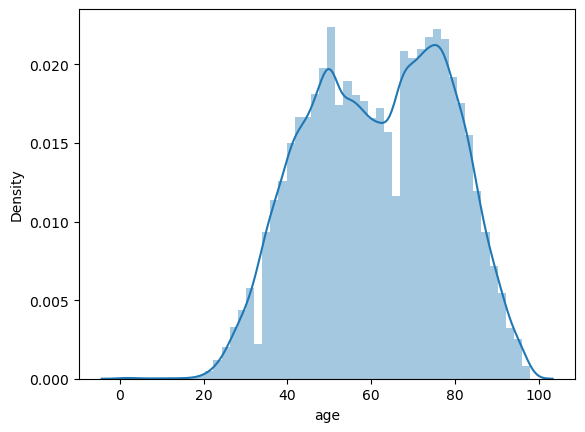

In [78]:
sns.distplot(numerical['age'])
plt.show()

In [79]:
numerical['age'] = numerical["age"].fillna(np.mean(numerical['age']))

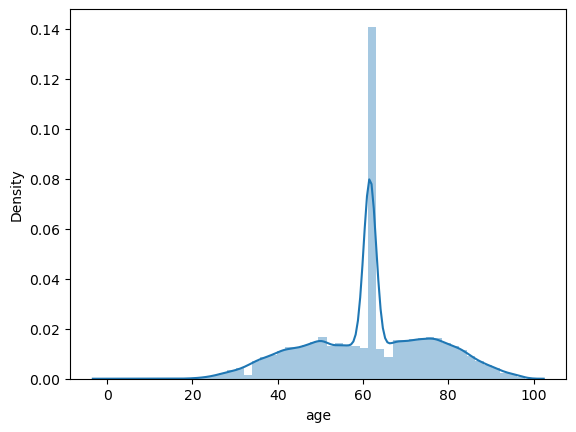

In [80]:
sns.distplot(numerical['age'])
plt.show()

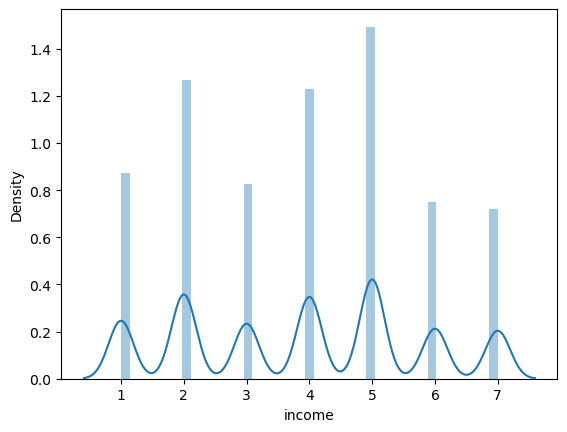

In [81]:
sns.distplot(numerical['income']) 
plt.show()

In [82]:
# looks like the variable is actually categorical:

print(numerical['income'].value_counts(dropna=False))

numerical['income'] = numerical['income'].astype('object')

income
NaN    21286
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: count, dtype: int64


In [83]:
numerical.dtypes

odatedw       int64
tcode         int64
dob           int64
age         float64
income       object
             ...   
avggift     float64
controln      int64
hphone_d      int64
rfa_2f        int64
cluster2    float64
Length: 343, dtype: object

In [84]:
numerical['income'].mode()

0    5.0
Name: income, dtype: object

In [85]:
numerical['income'] = numerical['income'].fillna(5.0) # Replacing the null values with the most represented category

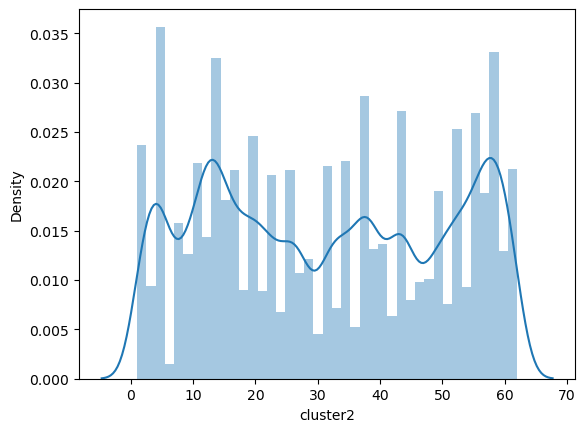

In [86]:
sns.distplot(numerical[numerical['cluster2'].isna()==False]['cluster2']) 
plt.show()

In [87]:
numerical['cluster2'].value_counts()

cluster2
13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
30.0     647
46.0     644
29.0     569
40.0     369
6.0      211
Name: count, Length: 62, dtype: int64

In [88]:
numerical['cluster2'].mean()

31.533711167086484

In [89]:
np.ceil(numerical['cluster2'].mean())

32.0

In [90]:
numerical['cluster2'] = numerical['cluster2'].fillna(np.ceil(numerical['cluster2'].mean()))

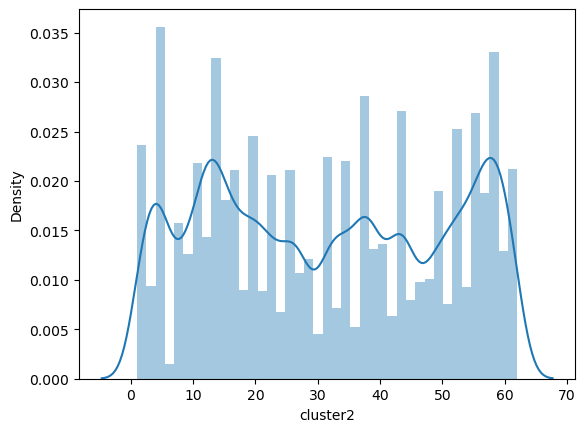

In [91]:
sns.distplot(numerical['cluster2']) 
plt.show()

In [92]:
numerical.wealth2.value_counts(dropna=False)

wealth2
NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: count, dtype: int64

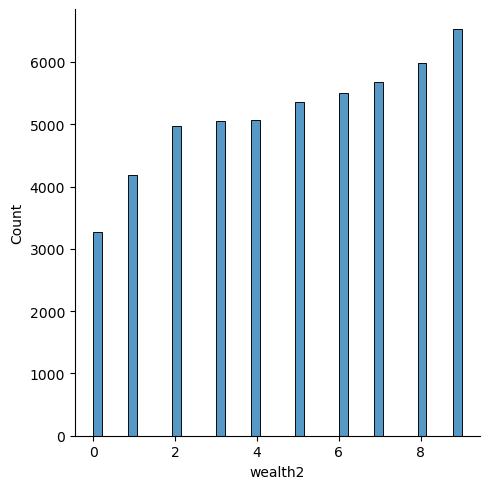

In [93]:
sns.displot(numerical['wealth2']) 
plt.show()

In [94]:
numerical['wealth2'] = numerical['wealth2'].astype('object')

In [95]:
numerical['wealth2'].median()

5.0

In [96]:
numerical['wealth2'] = numerical['wealth2'].fillna(5.0) # median (more realistic scenario)

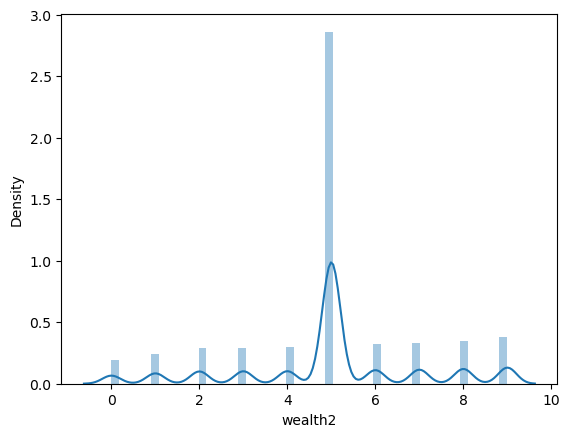

In [97]:
sns.distplot(numerical['wealth2']) 
plt.show()

In [98]:
numerical.wealth2.value_counts(dropna=False)

wealth2
5.0    49174
9.0     6523
8.0     5975
7.0     5684
6.0     5497
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: count, dtype: int64

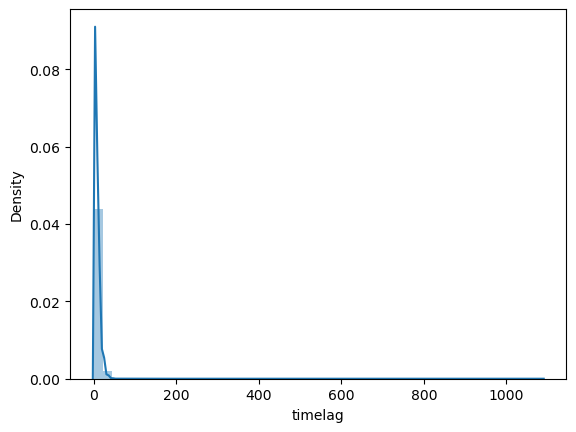

In [99]:
sns.distplot(numerical['timelag']) 
plt.show()

In [100]:
# NaN could very well mean that they only made one donation so far

numerical['timelag'] = numerical['timelag'].fillna(0.0)

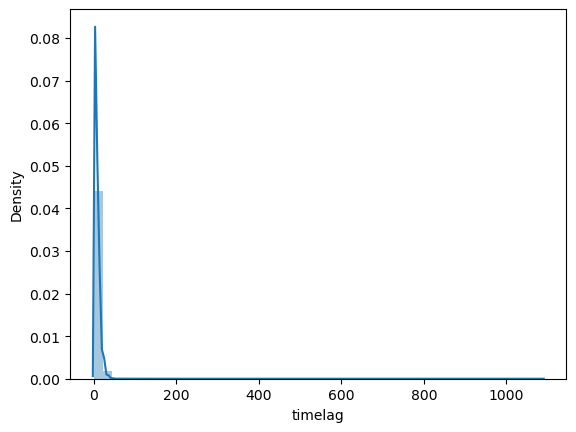

In [101]:
sns.distplot(numerical['timelag']) 
plt.show()

In [102]:
numerical = numerical.drop(columns=drop_list)

In [103]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

column_name  nulls
5       wealth1  44732
135         msa    132
136         adi    132
137         dma    132
315    nextdate   9973

3. Use appropriate methods to clean the columns which still contain NaN values.
4. Use appropriate EDA technique where ever necessary.

In [104]:
numerical.wealth1.value_counts(dropna=False)

wealth1
NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: count, dtype: int64

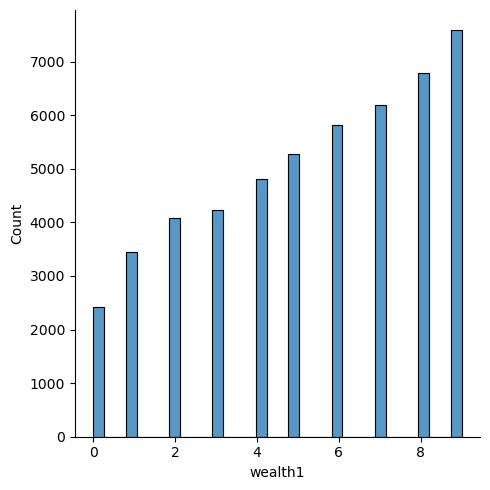

In [105]:
sns.displot(numerical['wealth1']) 
plt.show()

In [106]:
numerical['wealth1'] = numerical['wealth1'].astype('object')

In [107]:
numerical['wealth1'].median()

6.0

In [108]:
numerical['wealth1'] = numerical['wealth1'].fillna(6.0) # median (more realistic scenario)

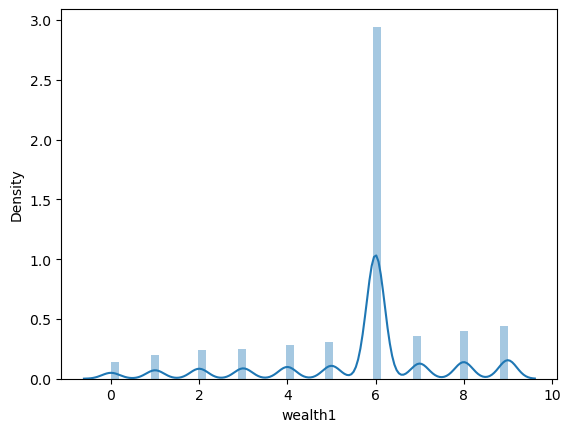

In [109]:
sns.distplot(numerical['wealth1']) 
plt.show()

In [110]:
numerical.wealth1.value_counts(dropna=False)

wealth1
6.0    50557
9.0     7585
8.0     6793
7.0     6198
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: count, dtype: int64

In [111]:
numerical.head()

odatedw  tcode   dob        age  income  wealth1  hit  malemili  malevet  \
0     8901      0  3712  60.000000     5.0      6.0    0         0       39   
1     9401      1  5202  46.000000     6.0      9.0   16         0       15   
2     9001      1     0  61.611649     3.0      1.0    2         0       20   
3     8701      0  2801  70.000000     1.0      4.0    2         0       23   
4     8601      0  2001  78.000000     3.0      2.0   60         1       28   

   vietvets  wwiivets  localgov  stategov  fedgov  wealth2  pop901  pop902  \
0        34        18        10         2       1      5.0     992     264   
1        55        11         6         2       1      9.0    3611     940   
2        29        33         6         8       1      1.0    7001    2040   
3        14        31         3         0       3      0.0     640     160   
4         9        53        26         3       2      5.0    2520     627   

   pop903  pop90c1  pop90c2  pop90c3  pop90c4  pop90c5  eth1  eth2  eth3  \
0     332        0       35       65       47       53    92     1     0   
1     998       99        0        0       50       50    67     0     0   
2    2669        0        2       98       49       51    96     2     0   
3     219        0        8       92       54       46    61     0     0   
4     761       99        0        0       46       54     2    98     0   

   eth4  eth5  eth6  eth7  eth8  eth9  eth10  eth11  eth12  eth13  eth14  \
0     0    11     0     0     0     0      0      0      0     11      0   
1    31     6     4     2     6     4     14      0      0      2      0   
2     0     2     0     0     0     0      0      0      0      2      0   
3    11    32     6     2     0     0      0      0      0     31      0   
4     0     1     0     0     0     0      0      0      0      0      0   

   eth15  eth16  age901  age902  age903  age904  age905  age906  age907  \
0      0      0      39      48      51      40      50      54      25   
1      1      4      34      41      43      32      42      45      32   
2      0      0      35      43      46      37      45      49      23   
3      0      1      32      40      44      34      43      47      25   
4      0      0      33      45      50      36      46      50      27   

   chil1  chil2  chil3  agec1  agec2  agec3  agec4  agec5  agec6  agec7  \
0     31     42     27     11     14     18     17     13     11     15   
1     33     46     21     13     14     33     23     10      4      2   
2     35     40     25     13     20     19     16     13     10      8   
3     45     35     20     15     25     17     17     12      7      7   
4     34     43     23     14     21     13     15     20     12      5   

   chilc1  chilc2  chilc3  chilc4  chilc5  hhage1  hhage2  hhage3  hhn1  hhn2  \
0      12      11      34      25      18      26      10      23    18    33   
1      11      16      36      22      15      12       1       5     4    21   
2      15      14      30      22      19      25      10      23    21    35   
3      20      17      30      14      19      25      11      23    23    27   
4      13      15      34      19      19      31       7      27    16    26   

   hhn3  hhn4  hhn5  hhn6  marr1  marr2  marr3  marr4  hhp1  hhp2  dw1  dw2  \
0    49    28    12     4     61      7     12     19   198   276   97   95   
1    75    55    23     9     69      4      3     24   317   360   99   99   
2    44    22     6     2     63      9      9     19   183   254   69   69   
3    50    30    15     8     63      9      6     23   199   283   85   83   
4    57    36    24    14     42     17      9     33   235   323   99   98   

   dw3  dw4  dw5  dw6  dw7  dw8  dw9   hv1   hv2  hv3  hv4  hu1  hu2  hu3  \
0    2    2    0    0    7    7    0   479   635    3    2   86   14   96   
1    0    0    0    0    0    0    0  5468  5218   12   10   96    4   97   
2    1    6    5    3    3    3    0   497   546  

In [112]:
numerical.msa.value_counts(dropna=False)

msa
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: count, Length: 299, dtype: int64

In [113]:
numerical.msa.isna().sum()

132

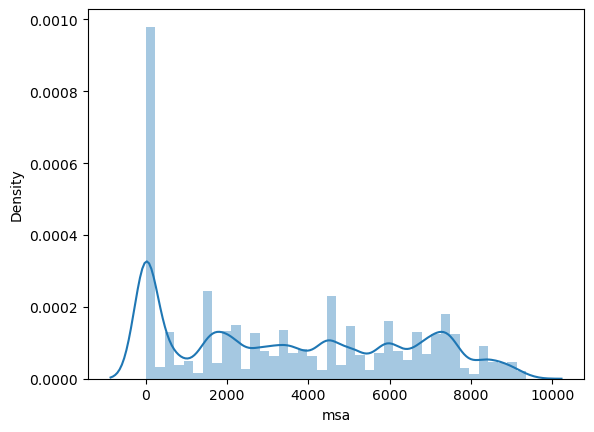

In [114]:
sns.distplot(numerical['msa'])
plt.show()

In [115]:
# Not relevant and already including state. We are going to drop it:

drop_list = ['msa']

In [116]:
numerical.adi.value_counts(dropna=False)

adi
13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: count, Length: 205, dtype: int64

In [117]:
numerical.adi.isna().sum()

132

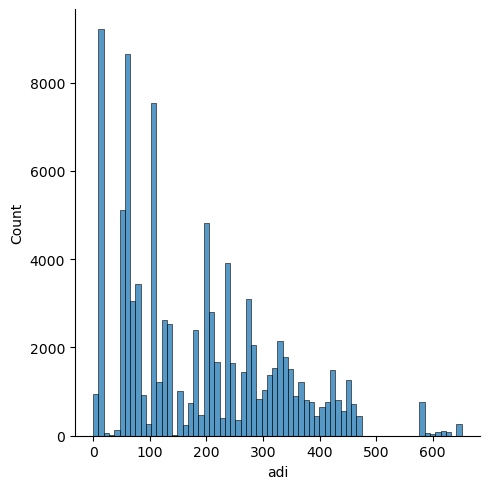

In [118]:
sns.displot(numerical['adi']) 
plt.show()

In [119]:
# Not relevant. We are going to drop it:

drop_list = drop_list + ['adi']

In [120]:
numerical.dma.value_counts(dropna=False)

dma
803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: count, Length: 207, dtype: int64

In [121]:
numerical.dma.isna().sum()

132

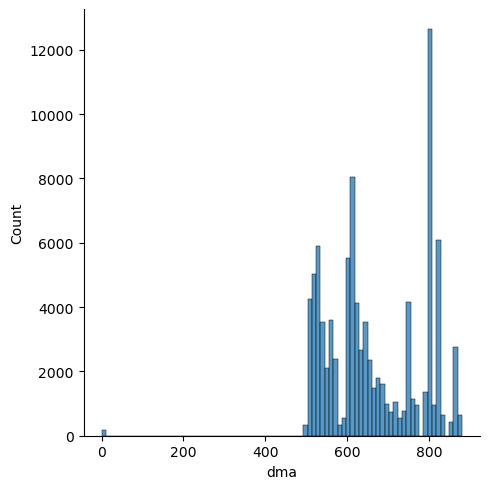

In [122]:
sns.displot(numerical['dma']) 
plt.show()

In [123]:
# Not relevant and already including state. We are going to drop it:

drop_list = drop_list + ['dma']

In [124]:
numerical.nextdate.value_counts(dropna=False)

nextdate
NaN       9973
9504.0    2253
9412.0    1970
8703.0    1959
9512.0    1870
          ... 
8107.0       1
7408.0       1
8207.0       1
8104.0       1
8412.0       1
Name: count, Length: 189, dtype: int64

In [125]:
numerical.nextdate.isna().sum()

9973

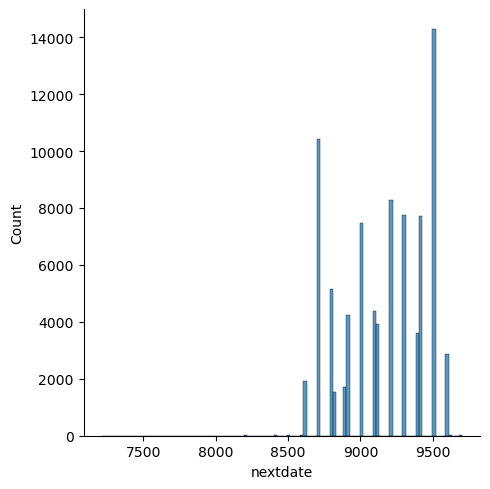

In [126]:
sns.displot(numerical['nextdate']) 
plt.show()

In [127]:
# small relevance (date)

drop_list = drop_list + ['nextdate']

In [128]:
numerical = numerical.drop(columns=drop_list)

In [129]:
numerical

odatedw  tcode   dob        age  income  wealth1  hit  malemili  \
0         8901      0  3712  60.000000     5.0      6.0    0         0   
1         9401      1  5202  46.000000     6.0      9.0   16         0   
2         9001      1     0  61.611649     3.0      1.0    2         0   
3         8701      0  2801  70.000000     1.0      4.0    2         0   
4         8601      0  2001  78.000000     3.0      2.0   60         1   
...        ...    ...   ...        ...     ...      ...  ...       ...   
95407     9601      1     0  61.611649     5.0      6.0    0        14   
95408     9601      1  5001  48.000000     7.0      9.0    1         0   
95409     9501      1  3801  60.000000     5.0      6.0    0         0   
95410     8601      0  4005  58.000000     7.0      6.0    0         0   
95411     8801      2  1801  80.000000     5.0      8.0    3         1   

       malevet  vietvets  wwiivets  localgov  stategov  fedgov  wealth2  \
0           39        34        18        10         2       1      5.0   
1           15        55        11         6         2       1      9.0   
2           20        29        33         6         8       1      1.0   
3           23        14        31         3         0       3      0.0   
4           28         9        53        26         3       2      5.0   
...        ...       ...       ...       ...       ...     ...      ...   
95407       36        47        11         7         8      13      5.0   
95408       31        43        19         4         1       0      5.0   
95409       18        46        20         7        23       0      5.0   
95410       28        35        20         9         1       1      7.0   
95411       33        22        27         8        10       3      8.0   

       pop901  pop902  pop903  pop90c1  pop90c2  pop90c3  pop90c4  pop90c5  \
0         992     264     332        0       35       65       47       53   
1        3611     940     998       99        0        0       50       50   
2        7001    2040    2669        0        2       98       49       51   
3         640     160     219        0        8       92       54       46   
4        2520     627     761       99        0        0       46       54   
...       ...     ...     ...      ...      ...      ...      ...      ...   
95407   27380    7252   10037       99        0        0       50       50   
95408    1254     322     361       96        0        4       51       49   
95409     552     131     205       99        0        0       53       47   
95410    1746     432     508       99        0        0       47       53   
95411    3935    1192    1342       99        0        0       48       52   

       eth1  eth2  eth3  eth4  eth5  eth6  eth7  eth8  eth9  eth10  eth11  \
0        92     1     0     0    11     0     0     0     0      0      0   
1        67     0     0    31     6     4     2     6     4     14      0   
2        96     2     0     0     2     0     0     0     0      0      0   
3        61     0     0    11    32     6     2     0     0      0      0   
4         2    98     0     0     1     0     0     0     0      0      0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
95407    78    10     6     4     5     0     0     0     1      1      0   
95408    91     3     0     2     6     1     0     1     0      0      0   
95409    82    14     0     1     9     0     0     0     0      0      0   
95410    92     1     1     5     8     0     1     2     0      1      0   
95411    86    12     0     1     1     0     0     0     0      0      0   

       eth12  eth13  eth14  eth15  eth16  age901  age902  age903  age904  \
0          0     11      0      0      0      39      48      51      40   
1          0      2      0      1      4      34      41      43      32   
2          0      2      0      0      0      35      43      46      37   
3          0     31      0      0      1      32   

In [130]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

Empty DataFrame
Columns: [column_name, nulls]
Index: []

In [134]:
numerical.to_csv('numerical7_02.csv', index = False)
categorical.to_csv('categorical7_02.csv', index = False)
Y.to_csv('target7_02.csv', index = False)

In [133]:
# alternative:
# numerical.to_pickle('numerical7_02.p')
# categorical.to_pickle('categorical7_02.p')
# Y.to_pickle('target7_02.p')